# Approaching red lights, optimally

Evaluation performance:

$\xi = x_\text{g} - \frac{(v_\text{max}-v_\text{g})^2}{2a_\text{max}}$

In [1]:
%matplotlib inline

from collections import OrderedDict

import matplotlib.pyplot as plt
import numpy as np

In [2]:
from trafficLight.simulation import Simulation
from trafficLight.trafficLight import UniformTrafficLight
from trafficLight.controller import LinearController, PowerLawController, LateBrakeController, CheatController
from trafficLight.visualization import showTrajectory
from trafficLight.evaluation import score
import trafficLight.constants as constants

uniformTrafficLight = UniformTrafficLight(constants.MAX_TIME)

## Comparison of different basic strategies

In [108]:
def runSimulations(params, drivers, trafficLight):
    simulations = [Simulation(params, driver, logging=True) for driver in drivers]

    for sim in simulations:
        sim.run()

    scores = OrderedDict()
    for sim in simulations:
        name = str(sim.driver)
        scores[name] = score(sim, trafficLight)

    return simulations, scores

In [109]:
drivers = [
    LateBrakeController(),
    PowerLawController(0.65),
    PowerLawController(1.0), # = LinearController
    PowerLawController(1.5),
    PowerLawController(2.0),
    PowerLawController(3.0)
    #CheatController()
]

In [130]:
params1 = {
    'max_acc': 1.0,
    'min_acc': -2.0,
    'max_vel': 1.0,
    'start_vel': 1.0,
    'start_pos': -1.0
}

params2 = params1.copy()
params2['max_acc'] = 0.4

params3 = params1.copy()
params3['max_acc'] = 0.1

sims1, scores1 = runSimulations(params1, drivers, uniformTrafficLight)
sims2, scores2 = runSimulations(params2, drivers, uniformTrafficLight)
sims3, scores3 = runSimulations(params3, drivers, uniformTrafficLight)

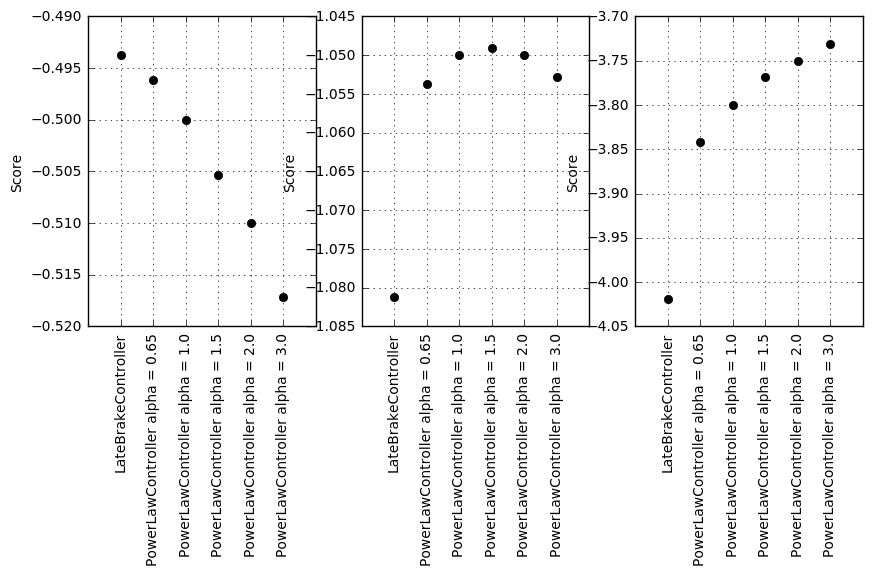

In [131]:
xs = list(range(len(scores)))

def plotScores(scores):
    plt.plot(xs, list(scores.values()), 'ok');
    plt.grid()
    plt.ylabel('Score');
    plt.xlim([-1, len(xs)]);
    plt.xticks(xs, scores.keys(), rotation=90);

plt.figure(figsize=(10,4))
plt.subplot(1, 3, 1)
plotScores(scores1)
plt.subplot(1, 3, 2)
plotScores(scores2)
plt.subplot(1, 3, 3)
plotScores(scores3)

## Plot the trajectories

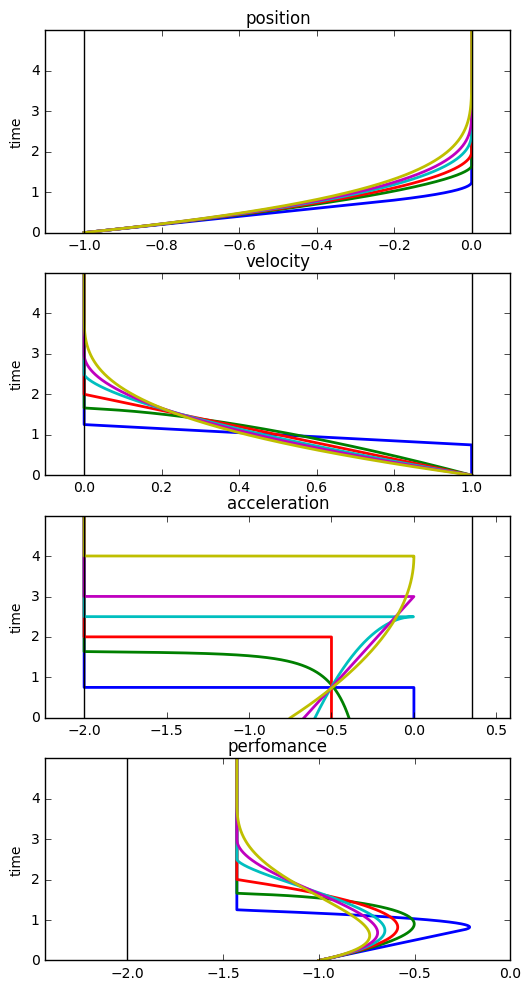

In [103]:
plt.figure(figsize=(6, 12))
showTrajectory(params, sims)

## Compare different PowerLawControllers

In [86]:
alphas = np.arange(0.5, 6.0, 0.1)
drivers = [PowerLawController(a) for a in alphas]

sims, scores = runSimulations(drivers, uniformTrafficLight)

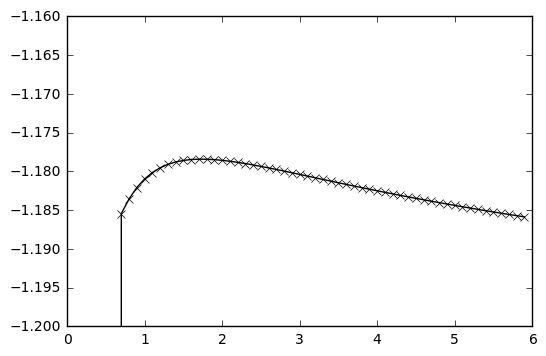

In [95]:
plt.plot(alphas, list(scores.values()), '-xk')
plt.ylim([-1.2, -1.16]);

In [96]:
np.array(list(scores.values())).max()

-1.1784164484335746

### Plot the final position (check numerical problems)

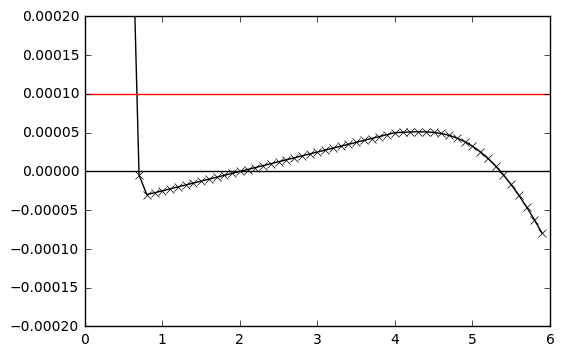

In [97]:
endpos = [sim.log[-1].pos for sim in sims]
plt.plot(alphas, endpos, '-xk')
plt.ylim([-0.0002, 0.0002])
plt.axhline(y=constants.RUNNING_RED_LIGHT_EPSILON,
            xmin=0, xmax=1, color='r')
plt.axhline(y=0, xmin=0, xmax=1, color='k');

## Benchmarks

In [76]:
%%timeit

driver = PowerLawController(1.4)
sim = Simulation(params, driver, logging=True)
sim.run()

1 loop, best of 3: 298 ms per loop
